<h3>This project is based on a tutorial by MLDawn on brain tumor detection using MRI images <sup>[1]</sup>.  It served as a learning experience, and the code presented here is adapted from their original implementation, which is available on their GitHub repository <sup>[2]</sup>.</h3>

<p>
<b>References:</b> </br>
[1] MLDawn Brain Tumor Detector Tutorial (https://www.youtube.com/@MLDawn) </br>
[2] MLDawn GitHub Repository (https://github.com/MLDawn/MLDawn-Projects/blob/main/Pytorch/Brain-Tumor-Detector/MRI-Brain-Tumor-Detecor.ipynb)
</p>

# Importing Libraries

In [1]:
# Basic libary
import numpy as np # For efficient numerical computation

# File management 
import sys # Dealing with command line
import glob # Deal with files & folders
import random # Data picking randomly

# Dealing with image data
import cv2 # Computer vision
import matplotlib.pyplot as plt # Data viz.
import seaborn as sns # Data viz.

# Spltting data to train, validate, & test
from sklearn.model_selection import train_test_split

# Data loading & Pre-processing 
import torch # PyTorch 
from torch.utils.data import Dataset, DataLoader, ConcatDataset # Deal with dataset

# Neural network
import torch.nn as nn # Neural Network
import torchvision.models as models # For using various models architecture 

# Model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # For model evaluation

#Dealing with warnings
import warnings

# To suppress ALL warnings:
warnings.filterwarnings("ignore")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\Projects\Neural Network - Deep Learning Projects\Brain Tumor Detection using MRI\brain_tumor_env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "D:\Projects\Neural Network - Deep Learning Projects\Brain Tumor Detection using MRI\brain_tumor_env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "D:\Proje

# Loading the dataset

> Dataset Link:  https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

<H4>Dataset Detail</H4>
<i>MRI image data</i>
<ul>
    <li>There are two folders in the root folder of dataset</li>
    <li>Yes: This contains images of patient with tumor.</li>
    <li>No: This contains images of patient with no tumor.</li>
    <li>Images are in JPEG format.</li>
</ul>

In [2]:
# Data
data = dict()
data['tumor_imgs'] = list()
data['no_tumor_imgs'] = list()

# Reading tumor images from yes folder
for tumor_img in glob.iglob(".//BrainTumorMRIDataset//yes//*.jpg"):
    img = cv2.imread(tumor_img)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    data['tumor_imgs'].append(img)

# Reading no tumor images from no folder
for no_tumor_img in glob.iglob(".//BrainTumorMRIDataset//no//*.jpg"):
    img = cv2.imread(no_tumor_img)
    img = cv2.resize(img,(128,128)) 
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    data['no_tumor_imgs'].append(img)

In [3]:
print(data)

{'tumor_imgs': [array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], shape=(128, 128, 3), dtype=uint8), array([[[255, 255, 255],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [246, 246, 246],
        [249, 249, 249]]

In [4]:
tumor = np.array(data['tumor_imgs'])
healthy = np.array(data['no_tumor_imgs'])

# Complete data
whole_data = np.concatenate((healthy, tumor))

In [5]:
print(whole_data)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

* Characteristics of dataset

In [6]:
print(healthy.shape)

print(tumor.shape)

(91, 128, 128, 3)
(154, 128, 128, 3)


# Visualizing the Brain Tumor data

In [7]:
def random_plot(healthy, tumor, num=5):
    # Selecting n random data
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    # Plotting healthy brain images
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Healthy brain')
        plt.imshow(healthy_imgs[i])

    # Plotting tumored brain images    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Brain with Tumor')
        plt.imshow(tumor_imgs[i])

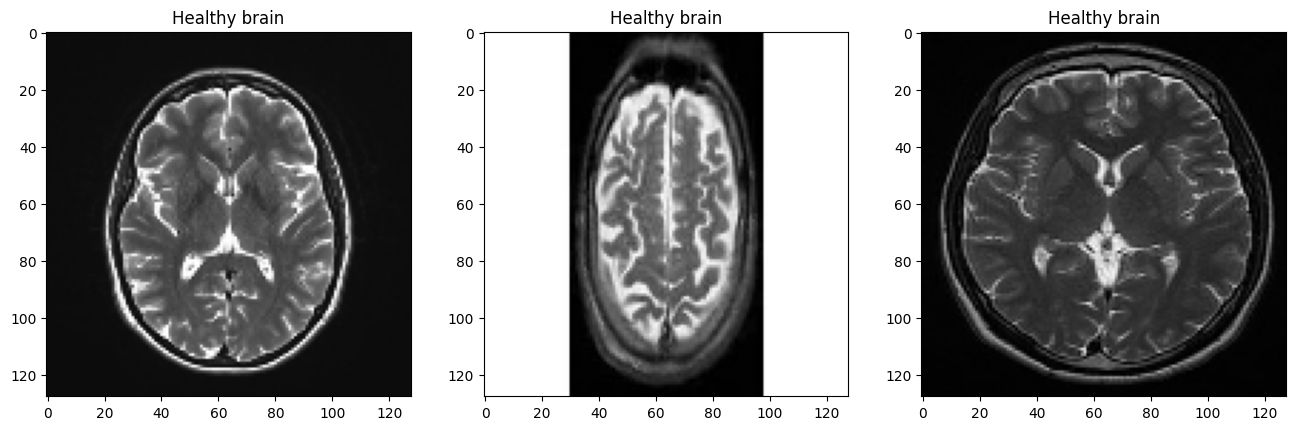

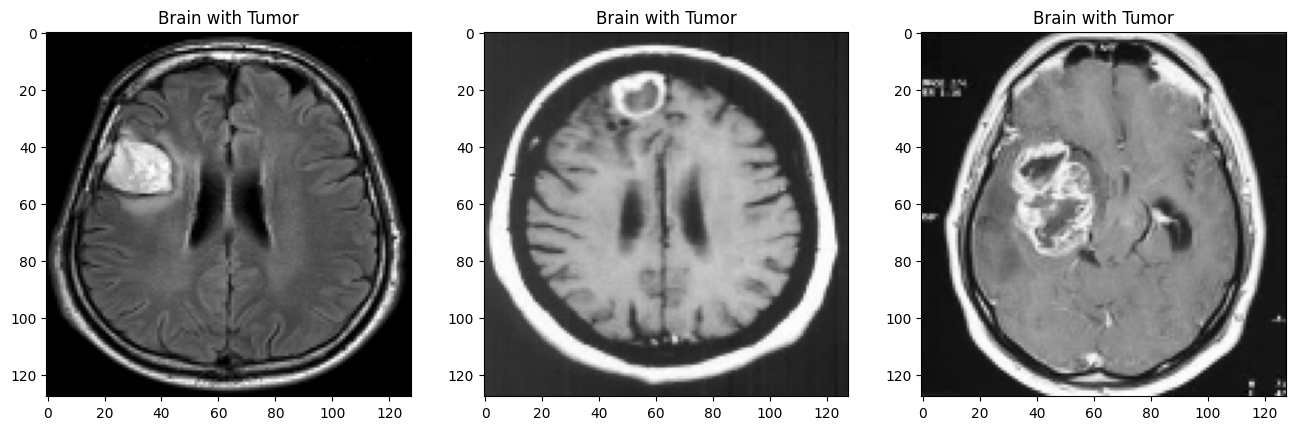

In [8]:
random_plot(healthy, tumor, 3)

# Balancing dataset using under-sampling

* Number of images

In [9]:
healthy.shape[0]

91

In [10]:
tumor.shape[0]

154

* Balancing

In [11]:
# Indexes given of image without replacement. Means, no image is taken twice. 
# np.random.choice(choice_range, no_of_elements, replacement)
under_sample_idx = np.random.choice(tumor.shape[0], healthy.shape[0], replace=False)

In [12]:
# Size balancing
tumor = tumor[under_sample_idx]

In [13]:
print(tumor.shape)
print(healthy.shape)

(91, 128, 128, 3)
(91, 128, 128, 3)


The above data seems balanced now.

# Data preprocessing & splitting

In [14]:
X = np.concatenate([tumor, healthy])  # Combine data
y = np.concatenate([np.ones(len(tumor)), np.zeros(len(healthy))])  # Create labels (1 for tumor, 0 for healthy)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)  # 15% for test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42) # 15% of 85% is approximately 15%

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 126
Validation set size: 28
Test set size: 28


In [15]:
# Shapes
# Training
print(X_train.shape, y_train.shape)

# Validation
print(X_val.shape, y_val.shape)

# Testing
print(X_test.shape, y_test.shape)

(126, 128, 128, 3) (126,)
(28, 128, 128, 3) (28,)
(28, 128, 128, 3) (28,)


# Implementing the Convolution Neural Network -- ResNet

In [16]:
# ResNet18
model = models.resnet18(pretrained=True)  

In [17]:
print(model.fc.in_features) # Get the number of input features to the last layer

512


In [18]:
# 1. Get the number of input features to the original fc layer:
num_features = model.fc.in_features

# 2. Create the new classifier head (Sequential):
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Dropout(0.3),
    nn.Linear(256, 1)
)

In [19]:
# Define device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


GPU available

In [20]:
# Moving model to GPU
model.to(device)  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
# Defining the loss function and the optimizer
criterion = nn.BCEWithLogitsLoss() # Using BCEWithLogitsLoss for numerical stability
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training model

In [22]:
# Parameters
# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 15
batch_size = 32

In [23]:
for epoch in range(num_epochs):
    # Training
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32).permute(0, 3, 1, 2).to(device) # .permute -> converts from channel last (num_imgs, height, width, channel) to channel first (batch, channel, height, width)
        labels = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).unsqueeze(1).to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation (after each epoch)
    model.eval()  # Set to evaluation mode
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for i in range(0, len(X_val), batch_size):
          val_inputs = torch.tensor(X_val[i:i+batch_size], dtype=torch.float32).permute(0, 3, 1, 2).to(device)
          val_labels = torch.tensor(y_val[i:i+batch_size], dtype=torch.float32).unsqueeze(1).to(device)
          val_outputs = model(val_inputs)
          val_loss += criterion(val_outputs, val_labels).item()
          predicted = torch.sigmoid(val_outputs) > 0.5 # Apply sigmoid and threshold
          total += val_labels.size(0)
          correct += (predicted == val_labels).sum().item()

        avg_val_loss = val_loss / len(X_val)
        val_accuracy = (100 * correct / total)

        val_losses.append(avg_val_loss)  # Store validation loss
        val_accuracies.append(val_accuracy)  # Store validation accuracy
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Store training loss and accuracy (at the end of each epoch)
    train_losses.append(loss.item()) # loss from the last batch
    # Calculate and append train accuracy (you'll need to do a full pass over the training set)
    model.eval()
    with torch.no_grad():
      train_correct = 0
      train_total = 0
      for i in range(0, len(X_train), batch_size):
        train_inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32).permute(0, 3, 1, 2).to(device)
        train_labels = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32).unsqueeze(1).to(device)
        train_outputs = model(train_inputs)
        train_predicted = torch.sigmoid(train_outputs) > 0.5 # Apply sigmoid and threshold
        train_total += train_labels.size(0)
        train_correct += (train_predicted == train_labels).sum().item()
      train_accuracy = (100 * train_correct / train_total)
      train_accuracies.append(train_accuracy)
    model.train() # Set back to training mode

Epoch [1/15], Loss: 0.4620, Validation Loss: 0.0211, Validation Accuracy: 71.43%
Epoch [2/15], Loss: 0.2184, Validation Loss: 0.0251, Validation Accuracy: 71.43%
Epoch [3/15], Loss: 0.0296, Validation Loss: 0.0756, Validation Accuracy: 64.29%
Epoch [4/15], Loss: 0.2479, Validation Loss: 0.0324, Validation Accuracy: 82.14%
Epoch [5/15], Loss: 0.0065, Validation Loss: 0.0407, Validation Accuracy: 71.43%
Epoch [6/15], Loss: 0.0381, Validation Loss: 0.0769, Validation Accuracy: 64.29%
Epoch [7/15], Loss: 0.0999, Validation Loss: 0.0351, Validation Accuracy: 82.14%
Epoch [8/15], Loss: 0.1238, Validation Loss: 0.0253, Validation Accuracy: 85.71%
Epoch [9/15], Loss: 0.0875, Validation Loss: 0.0265, Validation Accuracy: 85.71%
Epoch [10/15], Loss: 0.0067, Validation Loss: 0.0294, Validation Accuracy: 85.71%
Epoch [11/15], Loss: 0.0062, Validation Loss: 0.0288, Validation Accuracy: 82.14%
Epoch [12/15], Loss: 0.0045, Validation Loss: 0.0292, Validation Accuracy: 82.14%
Epoch [13/15], Loss: 0.00

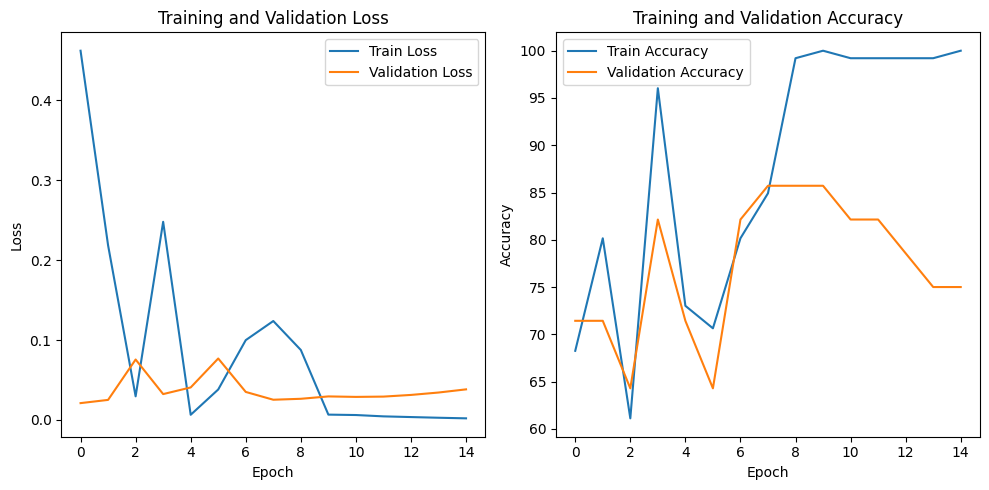

In [24]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()  # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

After executing multiple times with multiple values of hyperparameter & different architecture. It seems that we reduced overfitting to some extent.

Hyperparameter in optimizing:
> Learning rate = 0.001 </br>

# Testing 

In [25]:
model.eval()  # Set the model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad():  # Disable gradient calculations during testing
    test_loss = 0.0
    correct = 0
    total = 0
    all_predicted = [] # To store all predictions
    all_labels = [] # To store all true labels

    for i in range(0, len(X_test), batch_size): # Use your test batch size
        test_inputs = torch.tensor(X_test[i:i+batch_size], dtype=torch.float32).permute(0, 3, 1, 2).to(device) # Assuming channels last
        test_labels = torch.tensor(y_test[i:i+batch_size], dtype=torch.float32).unsqueeze(1).to(device)

        test_outputs = model(test_inputs)
        test_loss += criterion(test_outputs, test_labels).item() # Assuming you have defined 'criterion'
        predicted = torch.sigmoid(test_outputs) > 0.5  # Apply sigmoid and threshold (0.5)

        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()

        all_predicted.extend(torch.sigmoid(test_outputs).cpu().round().int().flatten().tolist()) # Store predictions as integers (0 or 1)
        all_labels.extend(test_labels.cpu().int().flatten().tolist()) # Store labels as integers (0 or 1)


    avg_test_loss = test_loss / len(X_test)
    test_accuracy = (100 * correct / total)

    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.0547, Test Accuracy: 67.86%


In [26]:
print(classification_report(all_labels, all_predicted))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.69      0.64      0.67        14

    accuracy                           0.68        28
   macro avg       0.68      0.68      0.68        28
weighted avg       0.68      0.68      0.68        28



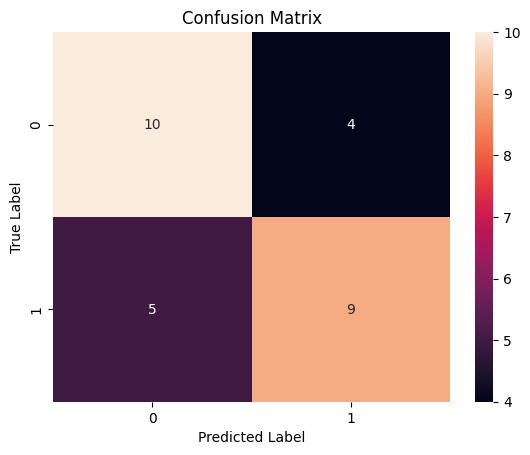

In [27]:
cm = confusion_matrix(all_labels, all_predicted)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1>Report</h1>
<ul>
    <li>
        After performing multiple tests we came to a good model which stills overfits & have room for improvement.
    </li>
    <li>
        But we can see that overfitting got reduced much.
    </li>
    <li>
        Testing accuracy of about 93% is a decent value.
    </li>
    <li>
        Confsion matrix yields a good result & detailed are present in classification report.
    </li>
</ul>

<h1>
    <b>Important: Every time model runs the accuracy drops or increase very bad.</b>
</h1>

# Save & loading the model

In [28]:
# Saving the model (state dictionary -- params)
torch.save(model.state_dict(), "brain_tumor_model.pth")

* Below code shows, how to save & load model

```bash
# Saving the model (state dictionary -- params)
torch.save(model.state_dict(), "brain_tumor_model.pth") 

# Or saving entire model
# torch.save(model, "brain_tumor_model_full.pth")

# Loading the model 
model = models.resnet18(pretrained=False) # Important: Recreate the model architecture first
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Dropout(0.3),
    nn.Linear(256, 1)
)
model.load_state_dict(torch.load("brain_tumor_model.pth"))  # Load the state dictionary
model.eval()  # Set to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# OR (if you saved the full model):
# model = torch.load("brain_tumor_model_full.pth")
# model.eval()
```

# StreamLit aaplication

In [29]:
!pip install streamlit  


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import numpy as np
from PIL import Image  # Import PIL Image
import torchvision.models as models

# Loading the model
try:
    model = models.resnet18(pretrained=False)
    num_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_features, 512),
        nn.ReLU(),  # Changed to ReLU
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.Tanh(), # Keep Tanh if it works better
        nn.Dropout(0.3),
        nn.Linear(256, 1)
    )
    model.load_state_dict(torch.load("brain_tumor_model.pth", map_location=torch.device('cpu'))) # Added map_location
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop() # Stop the app if the model can't be loaded

st.title("Brain Tumor Detection")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg"])

if uploaded_file is not None:
    try:
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        image_np = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)  # Decode to NumPy array

        if image_np is None:
            st.error("Uploaded file could not be decoded as an image. Please upload a valid JPEG image.")
        else:
            image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # BGR to RGB

            image_pil = Image.fromarray(image_np)  # Convert NumPy array to PIL Image

            st.image(image_pil, caption="Uploaded Image", use_column_width=True)  # Display PIL Image

            if st.button("Detect"):
                transform = transforms.Compose([
                    transforms.Resize((128, 128)),
                    transforms.ToTensor(),  # Now this will work!
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
                ])

                input_tensor = transform(image_pil).unsqueeze(0).to(device)  # Transform the PIL Image

                with torch.no_grad():
                    output = model(input_tensor)
                    prediction = torch.sigmoid(output).item()

                if prediction > 0.5:
                    st.write("Detected")
                else:
                    st.write("Not Detected")

            if st.button("Reset"):
                uploaded_file = None

    except Exception as e:
        st.error(f"Error processing image: {e}")

Overwriting app.py


In [ ]:
!streamlit run app.py